# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.opti(lr=lr, nesterov=True)
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.4448 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 153us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 8s 163us/step - loss: 14.4470 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 142us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 153us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 10s 191us/step - loss: 14.4436 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 181us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [======

50000/50000 [==============================] - 7s 145us/step - loss: 2.0601 - acc: 0.2713 - val_loss: 1.9361 - val_acc: 0.3213
Epoch 2/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.8869 - acc: 0.3364 - val_loss: 1.8886 - val_acc: 0.3266
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.8237 - acc: 0.3577 - val_loss: 1.8699 - val_acc: 0.3224
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7776 - acc: 0.3742 - val_loss: 1.7918 - val_acc: 0.3483
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7413 - acc: 0.3874 - val_loss: 1.7516 - val_acc: 0.3845
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7151 - acc: 0.3962 - val_loss: 1.7132 - val_acc: 0.3955
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6875 - acc: 0.4059 - val_loss: 1.6984 - val_acc: 0.3956
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 8s 158us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 159us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 157us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/500

50000/50000 [==============================] - 8s 151us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 14.5075 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 151us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 153us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=======

50000/50000 [==============================] - 9s 170us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 170us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=======

50000/50000 [==============================] - 7s 148us/step - loss: 2.1569 - acc: 0.2478 - val_loss: 2.1278 - val_acc: 0.2700
Epoch 3/50
50000/50000 [==============================] - 8s 150us/step - loss: 2.1010 - acc: 0.2705 - val_loss: 2.0790 - val_acc: 0.2805
Epoch 4/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.0574 - acc: 0.2858 - val_loss: 2.0398 - val_acc: 0.2967
Epoch 5/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.0227 - acc: 0.2979 - val_loss: 2.0091 - val_acc: 0.3058
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.9945 - acc: 0.3084 - val_loss: 1.9833 - val_acc: 0.3139
Epoch 7/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.9710 - acc: 0.3170 - val_loss: 1.9623 - val_acc: 0.3217
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.9508 - acc: 0.3221 - val_loss: 1.9441 - val_acc: 0.3316
Epoch 9/50
50000/50000 [=====================

Epoch 3/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7893 - acc: 0.3567 - val_loss: 1.8775 - val_acc: 0.3403
Epoch 4/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7181 - acc: 0.3821 - val_loss: 1.7733 - val_acc: 0.3410
Epoch 5/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.6562 - acc: 0.4079 - val_loss: 1.8555 - val_acc: 0.3338
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6105 - acc: 0.4252 - val_loss: 1.7922 - val_acc: 0.3732
Epoch 7/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.5746 - acc: 0.4366 - val_loss: 1.5398 - val_acc: 0.4476
Epoch 8/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5358 - acc: 0.4519 - val_loss: 1.6065 - val_acc: 0.4254
Epoch 9/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5050 - acc: 0.4605 - val_loss: 1.5873 - val_acc: 0.4363
Epoch 10/50
50000/50000 [=========

50000/50000 [==============================] - 4s 83us/step - loss: 1.6768 - acc: 0.4118 - val_loss: 1.6852 - val_acc: 0.4067
Epoch 5/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6389 - acc: 0.4263 - val_loss: 1.6482 - val_acc: 0.4154
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6114 - acc: 0.4359 - val_loss: 1.6278 - val_acc: 0.4220
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5894 - acc: 0.4428 - val_loss: 1.6023 - val_acc: 0.4360
Epoch 8/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5674 - acc: 0.4502 - val_loss: 1.5963 - val_acc: 0.4308
Epoch 9/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5491 - acc: 0.4580 - val_loss: 1.5707 - val_acc: 0.4415
Epoch 10/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5350 - acc: 0.4637 - val_loss: 1.5532 - val_acc: 0.4535
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 5s 102us/step - loss: 1.4924 - acc: 0.4682 - val_loss: 1.4845 - val_acc: 0.4721
Epoch 6/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.4666 - acc: 0.4789 - val_loss: 1.4882 - val_acc: 0.4701
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4256 - acc: 0.4929 - val_loss: 1.4398 - val_acc: 0.4853
Epoch 8/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3959 - acc: 0.5042 - val_loss: 1.4396 - val_acc: 0.4905
Epoch 9/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3596 - acc: 0.5172 - val_loss: 1.4198 - val_acc: 0.4962
Epoch 10/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3436 - acc: 0.5199 - val_loss: 1.4160 - val_acc: 0.4982
Epoch 11/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3148 - acc: 0.5318 - val_loss: 1.3996 - val_acc: 0.5035
Epoch 12/50
50000/50000 [==================

50000/50000 [==============================] - 4s 71us/step - loss: 2.2621 - acc: 0.1593 - val_loss: 2.2567 - val_acc: 0.1663
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 2.2519 - acc: 0.1707 - val_loss: 2.2468 - val_acc: 0.1762
Epoch 8/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2422 - acc: 0.1792 - val_loss: 2.2372 - val_acc: 0.1866
Epoch 9/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2327 - acc: 0.1859 - val_loss: 2.2280 - val_acc: 0.1957
Epoch 10/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.2236 - acc: 0.1930 - val_loss: 2.2191 - val_acc: 0.1988
Epoch 11/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2149 - acc: 0.1991 - val_loss: 2.2105 - val_acc: 0.2048
Epoch 12/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2065 - acc: 0.2056 - val_loss: 2.2023 - val_acc: 0.2078
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 4s 87us/step - loss: 1.5406 - acc: 0.4561 - val_loss: 1.5715 - val_acc: 0.4406
Epoch 8/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5131 - acc: 0.4648 - val_loss: 1.5879 - val_acc: 0.4245
Epoch 9/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4852 - acc: 0.4762 - val_loss: 1.5775 - val_acc: 0.4277
Epoch 10/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.4604 - acc: 0.4835 - val_loss: 1.5390 - val_acc: 0.4546
Epoch 11/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4387 - acc: 0.4941 - val_loss: 1.5302 - val_acc: 0.4549
Epoch 12/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4219 - acc: 0.4989 - val_loss: 1.5075 - val_acc: 0.4610
Epoch 13/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.3991 - acc: 0.5077 - val_loss: 1.5401 - val_acc: 0.4535
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 4s 82us/step - loss: 1.8058 - acc: 0.3799 - val_loss: 1.8093 - val_acc: 0.3743
Epoch 9/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7955 - acc: 0.3828 - val_loss: 1.7998 - val_acc: 0.3748
Epoch 10/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7860 - acc: 0.3855 - val_loss: 1.7909 - val_acc: 0.3810
Epoch 11/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7777 - acc: 0.3891 - val_loss: 1.7826 - val_acc: 0.3835
Epoch 12/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7700 - acc: 0.3911 - val_loss: 1.7762 - val_acc: 0.3891
Epoch 13/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7632 - acc: 0.3935 - val_loss: 1.7695 - val_acc: 0.3930
Epoch 14/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7569 - acc: 0.3953 - val_loss: 1.7637 - val_acc: 0.3906
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 5s 102us/step - loss: 1.4114 - acc: 0.5034 - val_loss: 1.4756 - val_acc: 0.4718
Epoch 10/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3844 - acc: 0.5149 - val_loss: 1.4575 - val_acc: 0.4780
Epoch 11/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3585 - acc: 0.5230 - val_loss: 1.4420 - val_acc: 0.4826
Epoch 12/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3361 - acc: 0.5314 - val_loss: 1.3976 - val_acc: 0.4970
Epoch 13/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3150 - acc: 0.5381 - val_loss: 1.3866 - val_acc: 0.5085
Epoch 14/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.2979 - acc: 0.5445 - val_loss: 1.3793 - val_acc: 0.5044
Epoch 15/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.2789 - acc: 0.5515 - val_loss: 1.3633 - val_acc: 0.5172
Epoch 16/50
50000/50000 [==============

Epoch 10/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3032 - acc: 0.1133 - val_loss: 2.3018 - val_acc: 0.1126
Epoch 11/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3005 - acc: 0.1155 - val_loss: 2.2991 - val_acc: 0.1144
Epoch 12/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2980 - acc: 0.1187 - val_loss: 2.2967 - val_acc: 0.1178
Epoch 13/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2957 - acc: 0.1205 - val_loss: 2.2945 - val_acc: 0.1200
Epoch 14/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2936 - acc: 0.1234 - val_loss: 2.2925 - val_acc: 0.1233
Epoch 15/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2916 - acc: 0.1261 - val_loss: 2.2906 - val_acc: 0.1270
Epoch 16/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.2898 - acc: 0.1294 - val_loss: 2.2888 - val_acc: 0.1297
Epoch 17/50
50000/50000 [=========

50000/50000 [==============================] - 4s 88us/step - loss: 1.6763 - acc: 0.4192 - val_loss: 1.6779 - val_acc: 0.4167
Epoch 12/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6617 - acc: 0.4258 - val_loss: 1.6774 - val_acc: 0.4114
Epoch 13/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6482 - acc: 0.4279 - val_loss: 1.6579 - val_acc: 0.4231
Epoch 14/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6354 - acc: 0.4331 - val_loss: 1.6470 - val_acc: 0.4270
Epoch 15/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6239 - acc: 0.4364 - val_loss: 1.6457 - val_acc: 0.4247
Epoch 16/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.6122 - acc: 0.4426 - val_loss: 1.6258 - val_acc: 0.4285
Epoch 17/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6019 - acc: 0.4448 - val_loss: 1.6124 - val_acc: 0.4418
Epoch 18/50
50000/50000 [=====================

50000/50000 [==============================] - 4s 82us/step - loss: 2.1017 - acc: 0.2608 - val_loss: 2.0978 - val_acc: 0.2650
Epoch 13/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0959 - acc: 0.2632 - val_loss: 2.0922 - val_acc: 0.2683
Epoch 14/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0905 - acc: 0.2664 - val_loss: 2.0870 - val_acc: 0.2702
Epoch 15/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0854 - acc: 0.2695 - val_loss: 2.0821 - val_acc: 0.2723
Epoch 16/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0806 - acc: 0.2710 - val_loss: 2.0776 - val_acc: 0.2743
Epoch 17/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0761 - acc: 0.2739 - val_loss: 2.0733 - val_acc: 0.2757
Epoch 18/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0718 - acc: 0.2741 - val_loss: 2.0692 - val_acc: 0.2782
Epoch 19/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 101us/step - loss: 1.6228 - acc: 0.4360 - val_loss: 1.6238 - val_acc: 0.4353
Epoch 14/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6097 - acc: 0.4428 - val_loss: 1.6138 - val_acc: 0.4376
Epoch 15/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5970 - acc: 0.4467 - val_loss: 1.6058 - val_acc: 0.4390
Epoch 16/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5866 - acc: 0.4492 - val_loss: 1.5966 - val_acc: 0.4423
Epoch 17/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.5753 - acc: 0.4520 - val_loss: 1.5904 - val_acc: 0.4415
Epoch 18/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5658 - acc: 0.4558 - val_loss: 1.5756 - val_acc: 0.4490
Epoch 19/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5559 - acc: 0.4603 - val_loss: 1.5779 - val_acc: 0.4452
Epoch 20/50
50000/50000 [==============

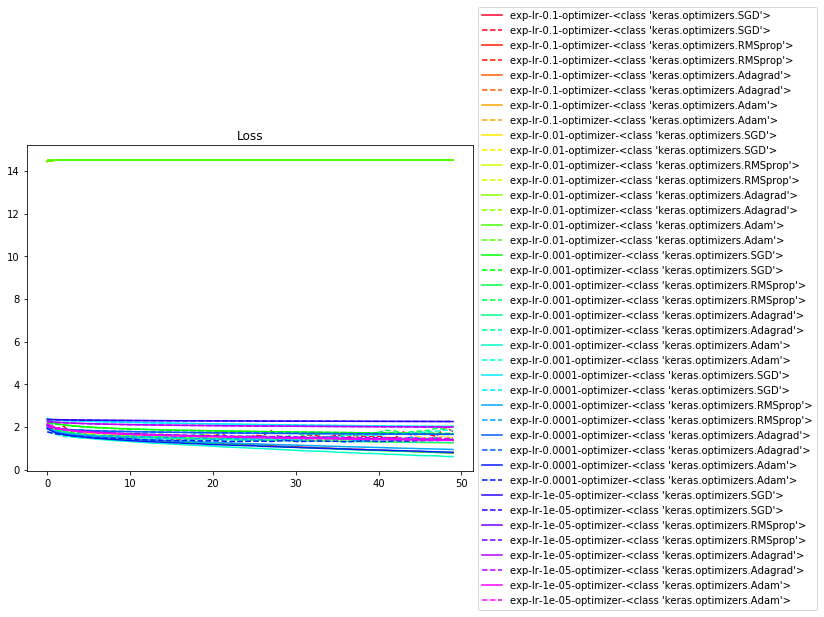

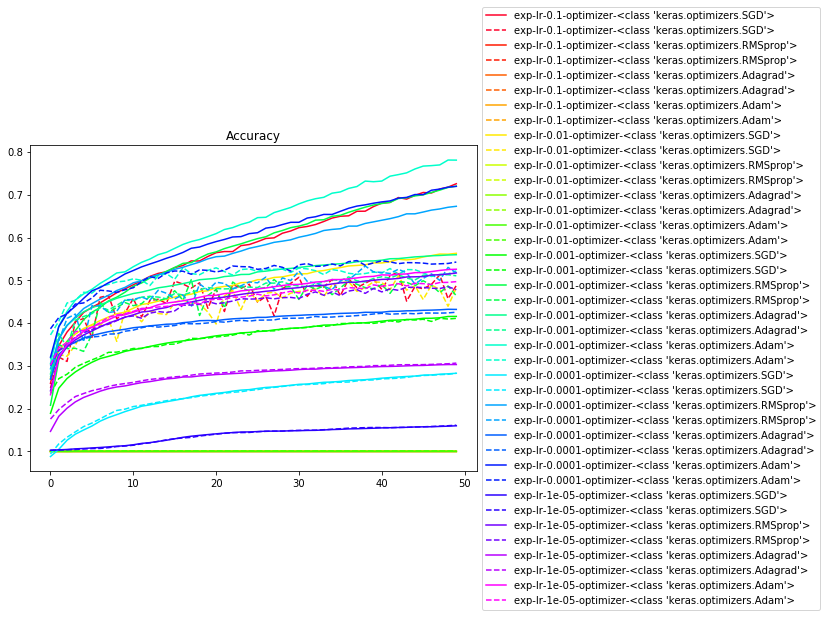

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()